In [84]:
import pandas as pd
import numpy as np
import xgboost
import matplotlib.pyplot as plt

import nltk
nltk.data.path.append("nltk_data")

## EDA

In [85]:
train = pd.read_csv("A1/train.csv", header=None)
test = pd.read_csv("A1/sample_input.csv", header=None)

In [86]:
train.head(20)

,0,1
0,"Definitely runs long, wore 4.5 inch heels and ...",5
1,I think it's a little big/long in the torso.,5
2,This dress is amazing! It has a built in like...,5
3,"didn't even need a bra and I am a 34DD, was so...",5
4,I wore this to my birthday dinner and loved it...,4
5,It fit perfect i have (VSsizeD) boobs and i wo...,5
6,"The material is a bit heavy, but it was fine f...",5
7,This gown was nice. It was a dress to glam up ...,3
8,It's actually a 18/20w which is why I say it r...,5
9,The dress is very comfortable with plenty of r...,4


In [87]:
train[0].isna().sum(), train[1].isna().sum()

(44, 0)

In [88]:
train = train.dropna()

In [89]:
train[1].unique()

array([5, 4, 3, 2, 1])

(array([  749.,     0.,  1984.,     0.,     0.,  7473.,     0., 37249.,
            0., 87205.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

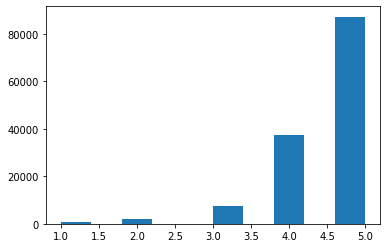

In [90]:
plt.hist(train[1])

In [91]:
train.loc[60485][0]

"I could've worn the 6, but it was a bit tight around the bust. The 8 was a little roomy around my waist and hips, but much more comfortable. The color is beautiful! I recommend a statement necklace to add some sparkle and a bit of interest to the neckline."

I can't find this dataset anywhere. Has it been artificially super-upsampled?

In [92]:
train.count()

0    134660
1    134660
dtype: int64

In [93]:
len(train[0].unique())

133800

Okay, something seems off. Get everything which starts with the same prompt

In [94]:
train.loc[2][0]

"This dress is amazing!  It has a built in like corset so it holds you in in all the right places!  It also plumps you up in your chest!  The fabric is comfortable and looks just like the picture.  I wore this dress to a Mardi Gras ball and got more compliments on it than any other dress I have ever worn.  The tan lining makes the dress look sexy without being too provocative ! I usually wear an 8L but I chose the 6L as it fit a little better.  The length was perfect as I am 5'10 and wore 2' heals. I would buy this dress!"

In [95]:
stw_1 = train.loc[train[0].str.lower().str.startswith("loved this dress so much")]
print(len(stw_1))
stw_1.head()

47


,0,1
15,Loved this dress so much. Color was beautiful....,3
5152,Loved this dress so much that I ended up purch...,5
11609,Loved this dress SO much. While I've loved a ...,5
12291,Loved this dress so much. My husband wanted me...,5
12691,Loved this dress so much I wanted to keep it! ...,5


In [96]:
stw_2 = train.loc[train[0].str.lower().str.startswith("this dress is amazing")]
print(len(stw_2))
stw_2.head()

272


,0,1
2,This dress is amazing! It has a built in like...,5
77,This dress is amazing! I was a bit unsure how ...,5
101,This dress is amazing. Runs small so I had to ...,5
373,This dress is amazing. Fit so well and made me...,5
933,This dress is amazing- it is fitted at the bus...,5


that's a lot of matches... Hypothesis is that the dataset is auto-generated.

let's look at some negative reviews and see if there's a pattern

In [97]:
train.loc[(train[1] == 1) | (train[1] == 1)]

,0,1
292,Awkward fit for someone who has a small chest.,1
679,"So I ordered this dress for dinner, but it was...",1
856,If you have supple boobs first off--Congrats!!...,1
867,The fabric would be great for a cool evening.,1
900,Even though I had an XS the romper was really ...,1
...,...,...
133815,The arms were way toooo small! I just knew I w...,1
133850,I ordered the XS ans Small for backup-- both w...,1
133874,"I am 5'7'', and this dress was very long and c...",1
133938,There is a big piece of fabric that drapes dow...,1


In [98]:
train.loc[train[0].str.lower().str.startswith('i am') & (train[1] == 1)]

,0,1
1461,I am 5' 2'' and tried the dress on 4 inch heel...,1
5941,I am 5'4 and this dress was too short for me w...,1
23775,"I am 5'10"" and with this dress on in barefeet,...",1
27615,I am pretty flexible with sizes and can usuall...,1
27848,I am 6' tall and rented the 8 and the 10. The ...,1
32024,I am pretty short and got the short version of...,1
42762,I am not tall (5-6) but this jacket was Very s...,1
42775,I am 5'6 and the large was way too short to we...,1
43682,"I am a 34C and per previous reviewers, sized u...",1
45391,I am a size 8 in almost everything. The size 1...,1


In [99]:
train.loc[train[0].str.lower().str.startswith('this is')]

,0,1
10,"This is a gorgeous dress that was PERFECT, exc...",4
198,This is a very pretty dress. The back is sexy ...,5
289,"This is an incredibly flattering, well made dr...",5
313,"This is a great top, very stylish but somewhat...",4
432,"This is a no fuss, easy to wear, beautiful dre...",5
...,...,...
134442,This is a great dress! The fabric color and te...,4
134476,This is a great top and you could even size do...,5
134483,This is a very causal and comfortable top! I l...,5
134493,This is probably because of my short/petit fra...,3


In [100]:
train.loc[train[0].str.lower().str.startswith('it fit') & (train[1] == 3)]

,0,1
349,"It fit well in the bust area, but was too tigh...",3
2474,it fit true to size,3
5253,It fits very large in the waist. I normally we...,3
5929,It fit everywhere except my hips. It was a bi...,3
11273,"It fit well. Under the arm, it was a little sc...",3
22411,it fit fine,3
26579,"It fit like a glove, but the front skirt porti...",3
31110,It fit perfectly!,3
38161,It fit true to size and was very comfortable f...,3
45637,It fit but it felt like a straight jacket. It...,3


More notes:
- There are a lot of height values. Parsing them would be important? I don't know.

Let's do one more metric: number of exclamation marks (!) predicts sentiment (likelihood weigh this)

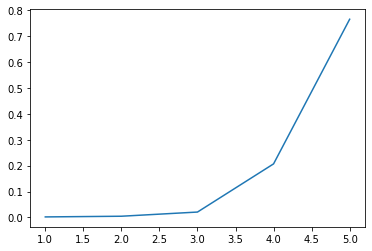

In [101]:
excl_cnt = train[0].str.count('!')
tot_excl_cnts = sum(excl_cnt)
excl_cnts = []
for i in range(1,6):
    n_excl_cnts = sum(excl_cnt.loc[train[1] == i])
    n_cnts = len(train.loc[train[1] == 1])
    norm_excl_cnts = (n_excl_cnts/tot_excl_cnts)*(n_cnts/len(train))
    excl_cnts.append(norm_excl_cnts)

# normalize excl_cnts to 1
s = sum(excl_cnts)
excl_cnts = [i/s for i in excl_cnts]
plt.plot(range(1,6), excl_cnts)

In [102]:
excl_cnts

[0.0019011723896402782,
 0.004536130613878558,
 0.020696095925820925,
 0.2069359438320298,
 0.7659306572386305]

very strong correlation with seeing an exclamation mark and it being a positive review.

In [103]:
# from collections import Counter
# from imblearn.combine import SMOTEENN
# from imblearn.over_sampling import RandomOverSampler
# 
# ros = RandomOverSampler(random_state=42)
# smote_enn = SMOTEENN(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(df[0].to_numpy().reshape(-1,1), df[1])
# 
# print(sorted(Counter(y_resampled).items()))

## Downsampling

so that my laptop doesn't spontaneously combust

In [107]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X, y = rus.fit_resample(train[0].to_numpy().reshape(-1,1), train[1])
train = pd.DataFrame({0: X.flatten(), 1: y})
train

,0,1
0,Awkward fit for someone who has a small chest.,1
1,"So I ordered this dress for dinner, but it was...",1
2,If you have supple boobs first off--Congrats!!...,1
3,The fabric would be great for a cool evening.,1
4,Even though I had an XS the romper was really ...,1
...,...,...
3740,I rented this dress for a black tie wedding an...,5
3741,"Definitely order a size up, as the chest and a...",5
3742,I loved this dress so much I'm considering buy...,5
3743,The fit is appropriate for the office and is a...,5


(array([749.,   0., 749.,   0.,   0., 749.,   0., 749.,   0., 749.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

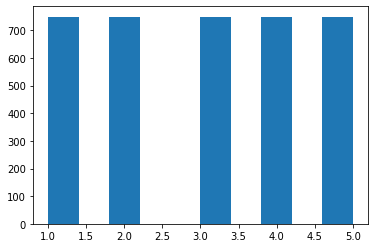

In [109]:
plt.hist(train[1])

## Feature Extraction

Tokenize -> POS tag -> negate -> stopword removal -> Stemming -> bigram + trigram extraction -> tf-idf -> tSNE embedding

In [110]:
# tokenize
from nltk.tokenize import word_tokenize
train[2] = train[0].apply(word_tokenize)
train

,0,1,2
0,Awkward fit for someone who has a small chest.,1,"[Awkward, fit, for, someone, who, has, a, smal..."
1,"So I ordered this dress for dinner, but it was...",1,"[So, I, ordered, this, dress, for, dinner, ,, ..."
2,If you have supple boobs first off--Congrats!!...,1,"[If, you, have, supple, boobs, first, off, --,..."
3,The fabric would be great for a cool evening.,1,"[The, fabric, would, be, great, for, a, cool, ..."
4,Even though I had an XS the romper was really ...,1,"[Even, though, I, had, an, XS, the, romper, wa..."
...,...,...,...
3740,I rented this dress for a black tie wedding an...,5,"[I, rented, this, dress, for, a, black, tie, w..."
3741,"Definitely order a size up, as the chest and a...",5,"[Definitely, order, a, size, up, ,, as, the, c..."
3742,I loved this dress so much I'm considering buy...,5,"[I, loved, this, dress, so, much, I, 'm, consi..."
3743,The fit is appropriate for the office and is a...,5,"[The, fit, is, appropriate, for, the, office, ..."


In [ ]:
# POS tag
import nltk
train[3] = train[2].apply(nltk.pos_tag)


In [113]:
train

,0,1,2,3
0,Awkward fit for someone who has a small chest.,1,"[Awkward, fit, for, someone, who, has, a, smal...","[(Awkward, NNP), (fit, NN), (for, IN), (someon..."
1,"So I ordered this dress for dinner, but it was...",1,"[So, I, ordered, this, dress, for, dinner, ,, ...","[(So, RB), (I, PRP), (ordered, VBD), (this, DT..."
2,If you have supple boobs first off--Congrats!!...,1,"[If, you, have, supple, boobs, first, off, --,...","[(If, IN), (you, PRP), (have, VBP), (supple, J..."
3,The fabric would be great for a cool evening.,1,"[The, fabric, would, be, great, for, a, cool, ...","[(The, DT), (fabric, NN), (would, MD), (be, VB..."
4,Even though I had an XS the romper was really ...,1,"[Even, though, I, had, an, XS, the, romper, wa...","[(Even, RB), (though, IN), (I, PRP), (had, VBD..."
...,...,...,...,...
3740,I rented this dress for a black tie wedding an...,5,"[I, rented, this, dress, for, a, black, tie, w...","[(I, PRP), (rented, VBD), (this, DT), (dress, ..."
3741,"Definitely order a size up, as the chest and a...",5,"[Definitely, order, a, size, up, ,, as, the, c...","[(Definitely, RB), (order, NN), (a, DT), (size..."
3742,I loved this dress so much I'm considering buy...,5,"[I, loved, this, dress, so, much, I, 'm, consi...","[(I, PRP), (loved, VBD), (this, DT), (dress, N..."
3743,The fit is appropriate for the office and is a...,5,"[The, fit, is, appropriate, for, the, office, ...","[(The, DT), (fit, NN), (is, VBZ), (appropriate..."


In [127]:
# negation via looking at PoS: negate all adjectives/verbs from a not/n't to the next stopword/punctuation mark
def negate(pos_arr):
    neg_pos_arr = []
    negating = False
    for word in pos_arr:
        if (word[0].lower() == 'not' or word[0].lower() == "n't"):
            negating = True
            neg_pos_arr.append(("POS", word[0], word[1]))
            continue
        elif (word[1] == '.' or word[1] == ':' or word[1] == 'IN' or word[1] == 'CC'):
            negating = False
            neg_pos_arr.append(("POS", word[0], word[1]))
            continue
        
        if negating and (word[1].startswith("VB") or word[1].startswith("JJ")):
            neg_pos_arr.append(("NEG", word[0], word[1]))
        else:
            neg_pos_arr.append(("POS", word[0], word[1]))
    
    return neg_pos_arr
        
train[4] = train[3].apply(negate)

In [129]:
# TODO stopword removal

In [130]:
# TODO stemming

In [131]:
# TODO bigram/trigram extraction

In [132]:
# TODO tf-idf vectorization of final features

In [ ]:
# TODO plot a tSNE embedding and see how separable features are. Add more processing steps if needed.